##### Importing Libraries & Files

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import os
from glob import glob
%matplotlib inline 

##### Giving variables to each dataframe 

In [4]:
tn = pd.read_csv("./zippedData2/tn_no_null") 

In [5]:
tmdb = pd.read_csv("./zippedData2/tmdb_df_no_null") 

In [6]:
bom = pd.read_csv("./zippedData2/new_bom_no_null") 

In [7]:
imdb = pd.read_csv("./zippedData2/imdb_r_no_null") 

In [8]:
tn_r = pd.read_csv("./zippedData2/Tn_r_no_null") 

##### Checking the total shortlisted data for analysing through Visualisation 

In [9]:
print(tn.shape,tmdb.shape,bom.shape,imdb.shape) 

(5782, 11) (26517, 13) (3387, 5) (146018, 10)


In [10]:
tn.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,day,date_f,profit
0,78,1915-02-08,The Birth of a Nation,110000.0,10000000.0,11000000.0,1915,2,8,1,20890000.0
1,24,1916-09-05,Intolerance,385907.0,0.0,0.0,1916,9,5,2,-385907.0


In [11]:
tmdb.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,year,month,day
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,11,19
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,3,26


In [12]:
bom.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010


In [13]:
imdb.head(2)

,primary_title,original_title,start_year,runtime_minutes,directors,writers,my_new_datetime,year,month,day
0,Sunghursh,Sunghursh,2013,175.0,nm0712540,"nm0023551,nm1194313,nm0347899,nm1391276",2013-01-01 01:01:01,2013,1,1
1,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,nm0002411,nm0002411,2019-01-01 01:01:01,2019,1,1


##### Checking the average runtime over the  last ten years for having viewer-ship. 

It can be observed that the average runtime distribution over the years has been pretty consistent at around 86-87 minutes so it will be safe to say that the runtime of the movies should be around 85-90 minutes to be risk free for having viewer-ship. 

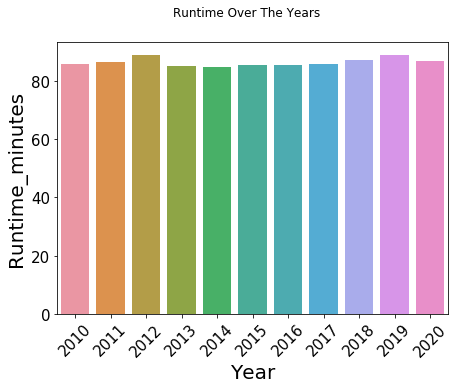

In [14]:
fig,ax = plt.subplots(figsize=(7, 5))
ax = sns.barplot(x='year', y='runtime_minutes', data=imdb,ci=None)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
fig.suptitle('Runtime Over The Years', fontsize=12 )
ax.set_xlabel('Year',fontsize=20)
ax.set_ylabel('Runtime_minutes',fontsize=20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
plt.show();

##### Finding the co relation between the domestic and worldwide gross using two different data frames :
It can be observed that there is a positive relationship between domestic and worldwide gross but the worldwide gross seems to overtake the domestic over a period of time

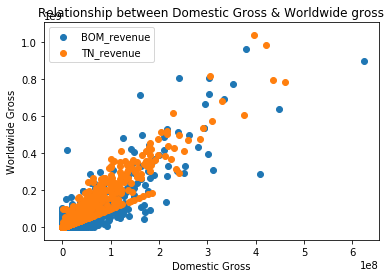

In [15]:
plt.scatter(bom['domestic_gross'][1:1000],bom['foreign_gross'][1:1000], label='BOM_revenue')
plt.scatter(tn['domestic_gross'][1:1000],tn['worldwide_gross'][1:1000], label='TN_revenue') 
plt.title('Relationship between Domestic Gross & Worldwide gross')
plt.xlabel('Domestic Gross')
plt.ylabel('Worldwide Gross')
plt.legend()
plt.show() 

##### Relationship between production budget and profit
There is a positive co relation between the budget and the profit, so it would not be wrong to say that the investment in producing a movie regularly results in profit.Though budget numbers for movies can be both difficult to find and unreliable. Studios often try to keep the information secret and will use accounting tricks to inflate or reduce announced budgets but with the available data it can be can be observed the chances of loss is either not there or is minimal

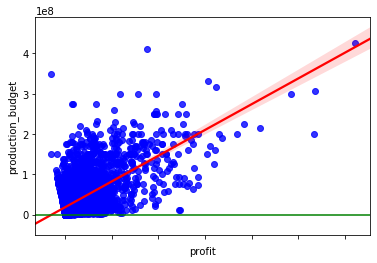

In [16]:
tn = tn.sort_values('release_date')
tn['date_f'] = pd.factorize(tn['release_date'])[0] + 1
mapping = dict(zip(tn['date_f'], tn['release_date']))

ax = sns.regplot('profit','production_budget', data=tn,scatter_kws={'color': 'blue'}, line_kws={'color': 'red'}) 
labels = pd.Series(ax.get_xticks()).map(mapping).fillna('')
ax.set_xticklabels(labels)
ax.axhline(0,color='green')

##### Finding the relation between the profit ,budget , domestic gross and foreign gross to see where the movies to be released for making higher profit
Figure 1 below : It can be seen that from  that the foreign gross has a clear domination over the domestic gross
Figure 2 below: it can be observed that the foreign market seems to have a upper hand in the last two decades and the domestic market has taken a back step. Similar is the case with the profit and the foreign gross as the foreign gross increases the gap between the budget also increases  

In [17]:
bom.groupby(bom['year'])

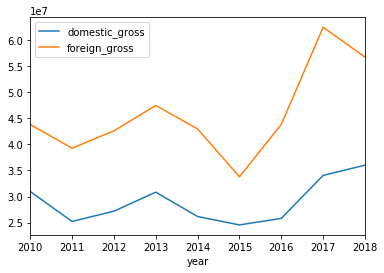

In [18]:
bom.groupby('year').mean().plot()

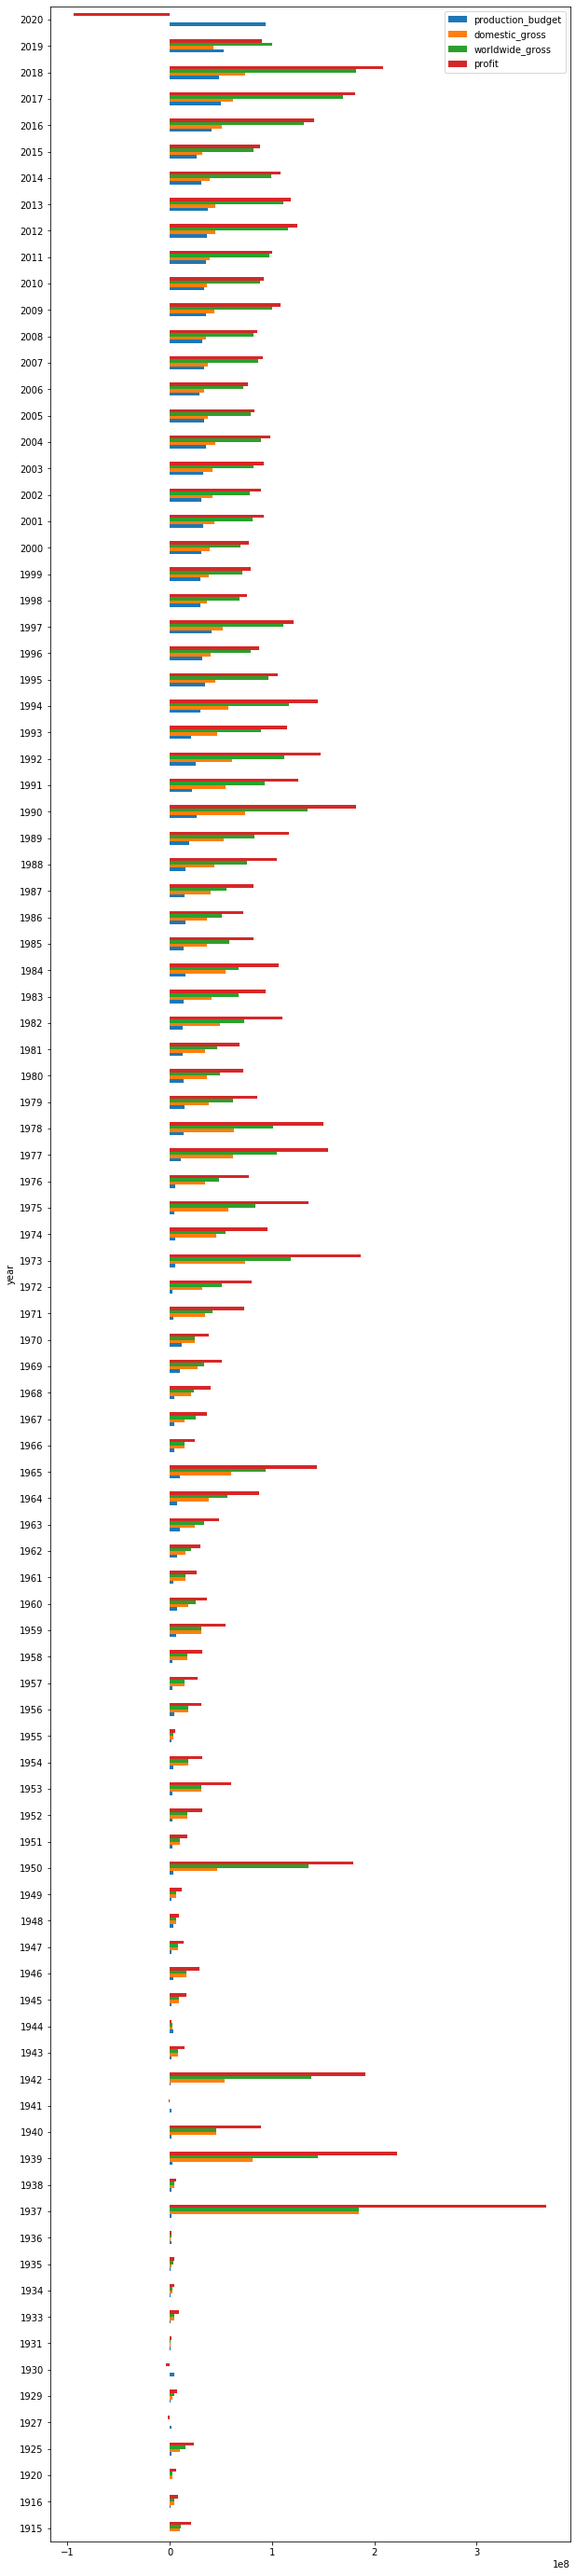

In [19]:
tn_r.groupby('year').mean().plot(kind = 'barh', figsize = (10, 50)) 